## NYC Green Taxi

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

Reading in the data and finding the number of rows and columns

In [7]:
df = pd.read_csv("green_tripdata_2015-09.csv")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])     

Number of rows: 1494926
Number of columns: 21


### Cleaning

In [8]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


As we can see that Ehail_fee majorly consists of NAN values, hence it's better to drop it.

Rate Code Id has some values bigger than 6 which is not possible, hence we are changing that to the most common value in the column.

Extra column has some negative values, replacing them with the most common value.

Trip_type has some NAN values, replacing them with 1

Total_amount, Fare_amount, improvement_surcharge, Tip_amount, Tolls_amount, MTA_tax has some negative values, coverting them to the absolute values 

In [9]:
df = df.drop(["Ehail_fee"], axis =1 )

#RateCodeID
ind = df[~((df["RateCodeID"]>=1) & (df['RateCodeID']<=6))].index
df.groupby(["RateCodeID"]).size()
df.loc[ind, 'RateCodeID']=1

#Extra
ind = df[~((df.Extra==0) | (df.Extra==0.5) | (df.Extra==1))].index
df.groupby(["Extra"]).size()
df.loc[ind, 'Extra']=0

#Trip Type
df['Trip_type '] = df['Trip_type '].replace(np.NaN,1)

df["Total_amount"] = df["Total_amount"].abs()
df["Fare_amount"] = df["Fare_amount"].abs()
df["improvement_surcharge"] = df["improvement_surcharge"].abs()
df["Tip_amount"] = df["Tip_amount"].abs()
df["Tolls_amount"] = df["Tolls_amount"].abs()
df["MTA_tax"] = df["MTA_tax"].abs()

Plotting Histogram 

Text(0,0.5,'Count')

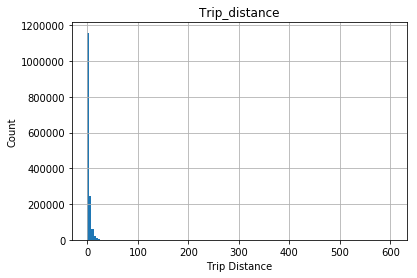

In [25]:
df.hist(column = "Trip_distance", bins = 150)
plt.xlabel("Trip Distance")
plt.ylabel("Count")

We can notice that a lot of values are either 0 or centring around 0. It makes the data positively skewed. 

Mean and Median Trip distance by hour of day

Text(0,0.5,'Trip Distance')

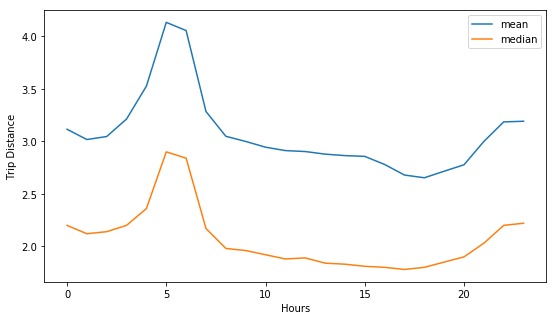

In [12]:
df['Pickup_dt'] = df["lpep_pickup_datetime"].apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
df['Dropoff_dt'] = df["Lpep_dropoff_datetime"].apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

df['Pickup_hour'] = df["Pickup_dt"].apply(lambda x:x.hour)


table1 = df.pivot_table(index='Pickup_hour', values='Trip_distance',aggfunc=('mean','median')).reset_index()

fig,ax = plt.subplots(1,1,figsize=(9,5))
table1[['mean','median']].plot(ax=ax)
plt.xlabel("Hours")
plt.ylabel("Trip Distance")

In [13]:
table1

,Pickup_hour,mean,median
0,0,3.115276,2.20
1,1,3.017347,2.12
2,2,3.046176,2.14
3,3,3.212945,2.20
4,4,3.526555,2.36
5,5,4.133474,2.90
6,6,4.055149,2.84
7,7,3.284394,2.17
8,8,3.048450,1.98
9,9,2.999105,1.96


We can see that a lot of taxis are hailed early in the morning but not in the evening. I hypothesize that people want to reach early for meetings and hence take the taxis. In the evening as there is no rush, probably people catch t=public transport

Airport trips, average fare both metered and total amount

In [15]:
airport_trips = df[(df["RateCodeID"]==2) | (df["RateCodeID"]==3)]
print("Number of trips originating/terminating from airports:", airport_trips.shape[0])
print("Average fair(metered):$", airport_trips["Fare_amount"].mean())
print("Average total amount(before tips):$", airport_trips["Total_amount"].mean())

Number of trips originating/terminating from airports: 5552
Average fair(metered):$ 51.36671469740634
Average total amount(before tips):$ 59.64035122478189


Variable for tip as a percentage of total fair

In [16]:
Tip = 100*df["Tip_amount"]/df["Total_amount"]

### Predictive Model

In [24]:
df['Trip_duration'] = ((df["Dropoff_dt"]-df["Pickup_dt"]).apply(lambda x:x.total_seconds()/60.))


X_train = df[["RateCodeID", "Pickup_longitude", "Pickup_latitude", "Dropoff_longitude", "Dropoff_latitude", "Passenger_count", "Trip_distance", "Fare_amount", "Extra", "MTA_tax", "Tolls_amount", "improvement_surcharge", "Total_amount", "Payment_type", "Trip_type ", "Trip_duration"]]
y_train = df["Tip_amount"]


X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.9, random_state=0)


#params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#clf = ensemble.GradientBoostingRegressor(**params)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))


R2 score: 0.999754609149
MSE: 0.00143868070722


I used the columns with continuous or ordinal data. I tried using a Gradient Boosting Regressor and it gave me an average score. I tried feature engineering by including Trip_duration but it didn't have much effect once I used Linear Regression model.

Using feature selection methods to check correlation in features would have been a good idea to try.

I used R2 score and MSE values for model evaluation.

I predicted the tip amount using all the features. Predicting tip amount as a percentage of total amount is just about using the tip variable with these values.

